In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import sys
import tensorflow.keras
import scipy as sp
import tensorflow as tf
import platform
import numpy as np
import matplotlib.pyplot as plt
import random


import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML\

# watermark the notebook


print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")

gpus = tf.config.list_physical_devices('GPU')
print("GPU Resources Available:\n\t",gpus)

# getting rid of the warning messages about optimizer graph
# import logging
# logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(3)


# Seed control, for better reproducibility 
# NOTE: this does not gurantee results are always the same
seed = 22
random.seed(seed)
np.random.seed(seed)



EPOCHS = 100


Python Platform: macOS-12.5.1-arm64-i386-64bit
Tensor Flow Version: 2.10.0
Keras Version: 2.10.0

Python 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]
GPU Resources Available:
	 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
def make_grid(img_batches):
    batch = img_batches.shape[0]
    n_elem = round(np.sqrt(batch))
    i = 0
    j = 0
    size =  img_batches.shape[1]
    grid = np.zeros((n_elem*size,n_elem*size,3))
    for chan in range(batch):
        im = img_batches[chan,:,:,:]
        grid[i*size:(i+1)*size,j*size:(j+1)*size,:] = im.reshape((size,size,3))
        i += 1
        if i >= n_elem:
            i = 0
            j += 1
            if j >= n_elem:
                break # we are at the end of the grid capacity
    return grid

BATCH_SIZE = 256 # might try to use large batches (we will discuss why later when we talk about BigGAN)
# NOTE: the batch_size should be an integer divisor of the data set size  or torch
# will give you an error regarding batch sizes of "0" when the data loader tries to
# load in the final batch

# setup GAN dataset
(train_images, train_labels), (_, _) = tf.keras.datasets.cifar10.load_data()
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

BUFFER_SIZE = 60000

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 32, 32, 3)


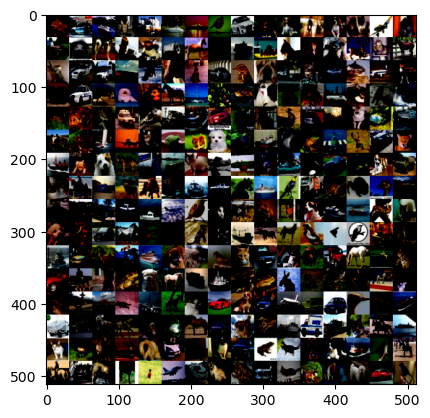

In [8]:
# get some random training images
iters = 0
for tmp in train_dataset:
    iters += 1
    
    if iters >= 1:
        break
    
tmp = tmp.numpy()
print(tmp.shape)
            
    
grid = make_grid(tmp)
plt.imshow(grid)